In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')
import time

In [2]:
# read yf3data.csv
df_yf = pd.read_csv('yf3data.csv')
df_yf

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600,0.000000
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800,0.006648
...,...,...,...,...,...,...,...,...,...
2457979,FDP,2020-12-23,24.200001,25.049999,24.200001,24.799999,23.759726,148200,0.023102
2457980,FDP,2020-12-24,25.010000,25.030001,24.620001,25.010000,23.960918,93600,0.008468
2457981,FDP,2020-12-28,25.180000,25.650000,25.120001,25.290001,24.229174,133100,0.011196
2457982,FDP,2020-12-29,25.170000,25.280001,24.230000,24.309999,23.290279,135500,-0.038751


In [3]:
# number of unique tickers in df_yf
print('Num of unique tickers:', df_yf['Ticker'].unique().shape[0])

Num of unique tickers: 888


In [4]:
# check data types
df_yf.dtypes

Ticker            object
Date              object
Open             float64
High             float64
Low              float64
Close            float64
Adj Close        float64
Volume             int64
Daily Returns    float64
dtype: object

In [5]:
# transform date column datetime
dates = df_yf['Date'].values
df_yf['Date'] = np.array(dates, dtype='datetime64[D]')
print("---Transformed Date Column")

df_yf.head()

---Transformed Date Column


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600,0.000000
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516526,601904800,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412874,552160000,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401017,477131200,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800,0.006648


In [6]:
# select columns
int_col = ['Ticker', 'Date', 'Daily Returns']
df_yf = df_yf[int_col]
df_yf

,Ticker,Date,Daily Returns
0,AAPL,2010-01-04,0.000000
1,AAPL,2010-01-05,0.001729
2,AAPL,2010-01-06,-0.015906
3,AAPL,2010-01-07,-0.001849
4,AAPL,2010-01-08,0.006648
...,...,...,...
2457979,FDP,2020-12-23,0.023102
2457980,FDP,2020-12-24,0.008468
2457981,FDP,2020-12-28,0.011196
2457982,FDP,2020-12-29,-0.038751


In [7]:
# Start Date
print('Start Date:', df_yf['Date'].min())

# End Date
print('End Date:', df_yf['Date'].max())

Start Date: 2010-01-04 00:00:00
End Date: 2020-12-30 00:00:00


In [8]:
# Retrieve S&P 500 Returns between 2010-01-04 and 2020-12-30
sp500 = pd.read_csv('snp500historicaldata.csv')
sp500.head()

,Date,Price,Open,High,Low
0,2010-01-04,1132.99,1116.56,1133.87,1116.56
1,2010-01-05,1136.52,1132.66,1136.63,1129.66
2,2010-01-06,1137.14,1135.71,1139.19,1133.95
3,2010-01-07,1141.69,1136.27,1142.46,1131.32
4,2010-01-08,1144.98,1140.52,1145.39,1136.22


In [9]:
# convert Date to datetime64[ns] data type
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.dtypes

Date     datetime64[ns]
Price           float64
Open            float64
High            float64
Low             float64
dtype: object

In [10]:
# function to calculate daily returns for portfolio, ticker
def dailyReturns2(df, col_name):
    # calculate daily returns for each ticker using vectorized operations
    df[col_name] = (df['Price'] / df['Price'].shift(1) - 1).fillna(0)
    return df

# Add S&P Daily Returns Column
dailyReturns2(sp500, 'SP500 Returns')
sp500

,Date,Price,Open,High,Low,SP500 Returns
0,2010-01-04,1132.99,1116.56,1133.87,1116.56,0.000000
1,2010-01-05,1136.52,1132.66,1136.63,1129.66,0.003116
2,2010-01-06,1137.14,1135.71,1139.19,1133.95,0.000546
3,2010-01-07,1141.69,1136.27,1142.46,1131.32,0.004001
4,2010-01-08,1144.98,1140.52,1145.39,1136.22,0.002882
...,...,...,...,...,...,...
2763,2020-12-23,3690.01,3693.42,3711.24,3689.28,0.000746
2764,2020-12-24,3703.06,3694.03,3703.82,3689.32,0.003537
2765,2020-12-28,3735.36,3723.03,3740.51,3723.03,0.008723
2766,2020-12-29,3727.04,3750.01,3756.12,3723.31,-0.002227


In [11]:
# Select Date and S&P500 Daily Returns columns
sp500Returns = sp500[['Date', 'SP500 Returns']]
sp500Returns

,Date,SP500 Returns
0,2010-01-04,0.000000
1,2010-01-05,0.003116
2,2010-01-06,0.000546
3,2010-01-07,0.004001
4,2010-01-08,0.002882
...,...,...
2763,2020-12-23,0.000746
2764,2020-12-24,0.003537
2765,2020-12-28,0.008723
2766,2020-12-29,-0.002227


In [12]:
# Constants
RISK_FREE_RATE = 0.02/252

# set index to Date
sp500Returns = sp500Returns.set_index('Date')
df_yf = df_yf.set_index('Date')

In [13]:
# show SP500Return DataFrame for merging
sp500Returns

,SP500 Returns
Date,
2010-01-04,0.000000
2010-01-05,0.003116
2010-01-06,0.000546
2010-01-07,0.004001
2010-01-08,0.002882
...,...
2020-12-23,0.000746
2020-12-24,0.003537
2020-12-28,0.008723


In [14]:
# show df_yf DataFrame for merging
df_yf

,Ticker,Daily Returns
Date,,
2010-01-04,AAPL,0.000000
2010-01-05,AAPL,0.001729
2010-01-06,AAPL,-0.015906
2010-01-07,AAPL,-0.001849
2010-01-08,AAPL,0.006648
...,...,...
2020-12-23,FDP,0.023102
2020-12-24,FDP,0.008468
2020-12-28,FDP,0.011196


In [15]:
# merge df_yf and SP500Returns
merge1 = df_yf.merge(sp500Returns, how='left', left_index=True, right_index=True)

# reset index
merge1 = merge1.reset_index()
merge1

,Date,Ticker,Daily Returns,SP500 Returns
0,2010-01-04,AAPL,0.000000,0.000000
1,2010-01-04,MSFT,0.000000,0.000000
2,2010-01-04,GOOGL,0.000000,0.000000
3,2010-01-04,AMZN,0.000000,0.000000
4,2010-01-04,XOM,0.000000,0.000000
...,...,...,...,...
2457979,2020-12-30,PRAA,0.030580,0.001342
2457980,2020-12-30,IVR,0.000000,0.001342
2457981,2020-12-30,ABM,0.000530,0.001342
2457982,2020-12-30,BRC,0.015211,0.001342


In [16]:
# read corpfund
corpfund = pd.read_csv('corpfund.csv')
corpfund

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2020-09-01,-239000000.0,7.767000e+09,NaN,5.712000e+09,...,348062907.0,348000000.0,354000000.0,3.652,6.997000e+09,0.0,31000000.0,0.0,20.106,3.003000e+09
1,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2020-09-01,-225000000.0,9.100000e+09,NaN,5.735000e+09,...,346370351.0,347000000.0,352000000.0,3.988,7.188000e+09,0.0,22000000.0,0.0,20.715,2.818000e+09
2,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2020-09-01,-88000000.0,9.696000e+09,NaN,6.169000e+09,...,347604202.0,344000000.0,356000000.0,4.581,7.746000e+09,0.0,-49000000.0,0.0,22.517,3.086000e+09
3,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2020-09-01,-63000000.0,8.044000e+09,NaN,4.598000e+09,...,345122160.0,347000000.0,355000000.0,4.378,6.129000e+09,0.0,5000000.0,0.0,17.663,3.192000e+09
4,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2020-09-01,278000000.0,8.649000e+09,NaN,5.096000e+09,...,348045143.0,347000000.0,355000000.0,4.833,6.601000e+09,0.0,60000000.0,0.0,19.023,3.504000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
972144,SPRB,MRT,2018-12-31,2018-12-31,2018-12-31,2020-10-09,0.0,4.775000e+06,NaN,4.773000e+06,...,NaN,4912955.0,4912955.0,0.000,4.775000e+06,0.0,0.0,0.0,0.972,2.068000e+06
972145,SPRB,MRT,2019-12-31,2019-12-31,2019-12-31,2020-10-09,0.0,4.692000e+06,4733500.0,4.652000e+06,...,NaN,5000000.0,5000000.0,0.000,4.692000e+06,0.0,0.0,0.0,0.938,3.490000e+05
972146,SPRB,MRT,2020-06-30,2020-06-30,2020-06-30,2020-10-09,0.0,3.896800e+07,NaN,3.847800e+07,...,NaN,NaN,NaN,NaN,3.896800e+07,0.0,NaN,0.0,NaN,3.214300e+07
972147,SPRB,MRY,2018-12-31,2018-12-31,2018-12-31,2020-10-09,0.0,4.775000e+06,NaN,4.773000e+06,...,NaN,4912955.0,4912955.0,0.000,4.775000e+06,0.0,0.0,0.0,0.972,2.068000e+06


In [17]:
# transform date column datetime
dates = corpfund['calendardate'].values
corpfund['calendardate'] = np.array(dates, dtype='datetime64[D]')
print("---Transformed Date Column")

corpfund.head()

---Transformed Date Column


,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2020-09-01,-239000000.0,7.767000e+09,NaN,5.712000e+09,...,348062907.0,348000000.0,354000000.0,3.652,6.997000e+09,0.0,31000000.0,0.0,20.106,3.003000e+09
1,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2020-09-01,-225000000.0,9.100000e+09,NaN,5.735000e+09,...,346370351.0,347000000.0,352000000.0,3.988,7.188000e+09,0.0,22000000.0,0.0,20.715,2.818000e+09
2,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2020-09-01,-88000000.0,9.696000e+09,NaN,6.169000e+09,...,347604202.0,344000000.0,356000000.0,4.581,7.746000e+09,0.0,-49000000.0,0.0,22.517,3.086000e+09
3,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2020-09-01,-63000000.0,8.044000e+09,NaN,4.598000e+09,...,345122160.0,347000000.0,355000000.0,4.378,6.129000e+09,0.0,5000000.0,0.0,17.663,3.192000e+09
4,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2020-09-01,278000000.0,8.649000e+09,NaN,5.096000e+09,...,348045143.0,347000000.0,355000000.0,4.833,6.601000e+09,0.0,60000000.0,0.0,19.023,3.504000e+09


In [18]:
# Keep rows with dimension ARQ
corpfund = corpfund[corpfund['dimension'] == 'ARQ']

# select chosen tickers
tickers = merge1['Ticker'].unique()

# select rows containing chosen tickers in corpfund
corpfund = corpfund[corpfund['ticker'].isin(tickers)]
corpfund

,ticker,dimension,calendardate,datekey,reportperiod,lastupdated,accoci,assets,assetsavg,assetsc,...,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
0,A,ARQ,2010-03-31,2010-06-07,2010-04-30,2020-09-01,-239000000.0,7.767000e+09,NaN,5.712000e+09,...,348062907.0,348000000.0,354000000.0,3.652,6.997000e+09,0.0,31000000.0,0.0,20.106,3.003000e+09
1,A,ARQ,2010-06-30,2010-09-07,2010-07-31,2020-09-01,-225000000.0,9.100000e+09,NaN,5.735000e+09,...,346370351.0,347000000.0,352000000.0,3.988,7.188000e+09,0.0,22000000.0,0.0,20.715,2.818000e+09
2,A,ARQ,2010-09-30,2010-12-20,2010-10-31,2020-09-01,-88000000.0,9.696000e+09,NaN,6.169000e+09,...,347604202.0,344000000.0,356000000.0,4.581,7.746000e+09,0.0,-49000000.0,0.0,22.517,3.086000e+09
3,A,ARQ,2010-12-31,2011-03-09,2011-01-31,2020-09-01,-63000000.0,8.044000e+09,NaN,4.598000e+09,...,345122160.0,347000000.0,355000000.0,4.378,6.129000e+09,0.0,5000000.0,0.0,17.663,3.192000e+09
4,A,ARQ,2011-03-31,2011-06-07,2011-04-30,2020-09-01,278000000.0,8.649000e+09,NaN,5.096000e+09,...,348045143.0,347000000.0,355000000.0,4.833,6.601000e+09,0.0,60000000.0,0.0,19.023,3.504000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971760,CTAS,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,-115950000.0,8.043381e+09,NaN,2.666177e+09,...,104625384.0,104625384.0,NaN,16.694,4.715692e+09,0.0,25215000.0,408400000.0,45.072,1.572827e+09
971768,HELE,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,-14320000.0,2.174193e+09,NaN,9.519180e+08,...,25353261.0,25325000.0,25458000.0,20.962,1.141502e+09,21290000.0,9257000.0,5092000.0,45.074,4.515830e+08
971923,PAYX,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,79500000.0,8.376900e+09,NaN,5.340200e+09,...,359500317.0,359100000.0,361300000.0,2.596,6.266000e+09,0.0,64500000.0,307300000.0,17.449,1.077100e+09
971927,JEF,ARQ,2020-09-30,2020-10-09,2020-08-31,2020-10-09,-196407000.0,5.177399e+10,NaN,NaN,...,255434677.0,255434677.0,NaN,6.327,4.985945e+10,0.0,107403000.0,0.0,195.195,NaN


In [19]:
# select interested columns from corpfund
int_col = ['ticker', 'calendardate', 'marketcap', 'pb']
corpfund = corpfund[int_col]

# change names
corpfund = corpfund.rename(columns={'ticker': 'Ticker', 'calendardate': 'Date', 'marketcap': 'Market Cap', 'pb': 'PB ratio'})

corpfund

,Ticker,Date,Market Cap,PB ratio
0,A,2010-03-31,1.047669e+10,3.993
1,A,2010-06-30,1.004128e+10,3.584
2,A,2010-09-30,1.412316e+10,4.375
3,A,2010-12-31,1.589288e+10,4.770
4,A,2011-03-31,1.660175e+10,4.200
...,...,...,...,...
971760,CTAS,2020-09-30,3.536129e+10,9.809
971768,HELE,2020-09-30,4.931209e+09,3.769
971923,PAYX,2020-09-30,2.962283e+10,10.661
971927,JEF,2020-09-30,5.062715e+09,0.538


In [20]:
# set index
merge1 = merge1.set_index(['Date', 'Ticker'])
corpfund = corpfund.set_index(['Date', 'Ticker'])

# combine merge1 df with corpfund df
merge2 = merge1.merge(corpfund, how='left', left_index=True, right_index=True)

# reset index
merge2 = merge2.reset_index()
merge2

,Date,Ticker,Daily Returns,SP500 Returns,Market Cap,PB ratio
0,2010-01-04,A,0.000000,0.000000,NaN,NaN
1,2010-01-04,AA,0.000000,0.000000,NaN,NaN
2,2010-01-04,AAL,0.000000,0.000000,NaN,NaN
3,2010-01-04,AAP,0.000000,0.000000,NaN,NaN
4,2010-01-04,AAPL,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...
2458310,2020-12-30,XRX,-0.000873,0.001342,NaN,NaN
2458311,2020-12-30,YUM,0.000548,0.001342,NaN,NaN
2458312,2020-12-30,ZBH,-0.001509,0.001342,NaN,NaN
2458313,2020-12-30,ZBRA,0.015104,0.001342,NaN,NaN


In [21]:
# sort by Ticker then Date
merge2 = merge2.sort_values(['Ticker', 'Date'])

In [22]:
# forward fill based on ticker
merge3 = merge2.groupby('Ticker').apply(lambda x: x.fillna(method='ffill', limit=None))

In [23]:
# drop rows with missing values
merge3 = merge3.dropna()
merge3

,Date,Ticker,Daily Returns,SP500 Returns,Market Cap,PB ratio
53280,2010-03-31,A,-0.006644,-0.003273,1.047669e+10,3.993
54179,2010-04-01,A,0.004652,0.007414,1.047669e+10,3.993
55067,2010-04-05,A,0.007815,0.007928,1.047669e+10,3.993
55955,2010-04-06,A,-0.007467,0.001684,1.047669e+10,3.993
56843,2010-04-07,A,-0.007812,-0.005877,1.047669e+10,3.993
...,...,...,...,...,...,...
2454762,2020-12-23,ZION,0.034967,0.000746,5.422842e+09,0.716
2455650,2020-12-24,ZION,-0.003907,0.003537,5.422842e+09,0.716
2456538,2020-12-28,ZION,0.000461,0.008723,5.422842e+09,0.716
2457426,2020-12-29,ZION,-0.013607,-0.002227,5.422842e+09,0.716


In [24]:
# import relevant libraries
import math

# add market risk premium
merge3['Market Risk Premium'] = merge3['SP500 Returns'] - RISK_FREE_RATE
merge3['BM ratio'] = 1/merge3['PB ratio']

merge3

,Date,Ticker,Daily Returns,SP500 Returns,Market Cap,PB ratio,Market Risk Premium,BM ratio
53280,2010-03-31,A,-0.006644,-0.003273,1.047669e+10,3.993,-0.003352,0.250438
54179,2010-04-01,A,0.004652,0.007414,1.047669e+10,3.993,0.007335,0.250438
55067,2010-04-05,A,0.007815,0.007928,1.047669e+10,3.993,0.007849,0.250438
55955,2010-04-06,A,-0.007467,0.001684,1.047669e+10,3.993,0.001605,0.250438
56843,2010-04-07,A,-0.007812,-0.005877,1.047669e+10,3.993,-0.005956,0.250438
...,...,...,...,...,...,...,...,...
2454762,2020-12-23,ZION,0.034967,0.000746,5.422842e+09,0.716,0.000666,1.396648
2455650,2020-12-24,ZION,-0.003907,0.003537,5.422842e+09,0.716,0.003457,1.396648
2456538,2020-12-28,ZION,0.000461,0.008723,5.422842e+09,0.716,0.008643,1.396648
2457426,2020-12-29,ZION,-0.013607,-0.002227,5.422842e+09,0.716,-0.002307,1.396648


In [25]:
# standardise Market Cap and BM ratio
merge3['Market Cap_Log'] = np.log(merge3['Market Cap'])
merge3['BM ratio_Log'] = np.log(merge3['BM ratio'])

merge3

,Date,Ticker,Daily Returns,SP500 Returns,Market Cap,PB ratio,Market Risk Premium,BM ratio,Market Cap_Log,BM ratio_Log
53280,2010-03-31,A,-0.006644,-0.003273,1.047669e+10,3.993,-0.003352,0.250438,23.072419,-1.384543
54179,2010-04-01,A,0.004652,0.007414,1.047669e+10,3.993,0.007335,0.250438,23.072419,-1.384543
55067,2010-04-05,A,0.007815,0.007928,1.047669e+10,3.993,0.007849,0.250438,23.072419,-1.384543
55955,2010-04-06,A,-0.007467,0.001684,1.047669e+10,3.993,0.001605,0.250438,23.072419,-1.384543
56843,2010-04-07,A,-0.007812,-0.005877,1.047669e+10,3.993,-0.005956,0.250438,23.072419,-1.384543
...,...,...,...,...,...,...,...,...,...,...
2454762,2020-12-23,ZION,0.034967,0.000746,5.422842e+09,0.716,0.000666,1.396648,22.413886,0.334075
2455650,2020-12-24,ZION,-0.003907,0.003537,5.422842e+09,0.716,0.003457,1.396648,22.413886,0.334075
2456538,2020-12-28,ZION,0.000461,0.008723,5.422842e+09,0.716,0.008643,1.396648,22.413886,0.334075
2457426,2020-12-29,ZION,-0.013607,-0.002227,5.422842e+09,0.716,-0.002307,1.396648,22.413886,0.334075


In [26]:
# retrieve tickers
tickers = merge3['Ticker'].unique()
tickers

array(['A', 'AA', 'AAL', 'AAP', 'AAPL', 'AB', 'ABB', 'ABC', 'ABM', 'ABT',
       'ACGL', 'ACIW', 'ACM', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK',
       'AEE', 'AEO', 'AEP', 'AES', 'AFG', 'AFL', 'AGCO', 'AGNC', 'AGO',
       'AIG', 'AIT', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALE', 'ALGN',
       'ALGT', 'ALK', 'ALL', 'ALNY', 'ALV', 'AMAT', 'AME', 'AMED', 'AMG',
       'AMGN', 'AMP', 'AMT', 'AMZN', 'AN', 'ANF', 'ANSS', 'AON', 'AOS',
       'APA', 'APD', 'APH', 'ARCC', 'ARE', 'ARLP', 'ARW', 'ASB', 'ASGN',
       'ASH', 'ASML', 'ATGE', 'ATI', 'ATO', 'ATR', 'ATVI', 'AVA', 'AVB',
       'AVGO', 'AVNT', 'AVY', 'AWI', 'AWK', 'AXP', 'AXS', 'AYI', 'AZN',
       'AZO', 'AZPN', 'B', 'BA', 'BAC', 'BAX', 'BB', 'BBBY', 'BBY', 'BC',
       'BCO', 'BCPC', 'BCS', 'BDC', 'BDN', 'BDX', 'BECN', 'BEN', 'BG',
       'BGCP', 'BHC', 'BIDU', 'BIG', 'BIIB', 'BIO', 'BK', 'BKD', 'BKH',
       'BKNG', 'BLK', 'BLKB', 'BMY', 'BOH', 'BOKF', 'BPOP', 'BR', 'BRC',
       'BRKR', 'BRO', 'BSX', 'BWA', 'BX', 'BXMT', 'BXP

In [27]:
# import relevant library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

# function to retrieve p value
def find_p_value(X, y):
    f_stat, p_val = f_regression(X, y)
    return p_val

# linear regression function
def linearReg(ticker, dataset, int_col):
    # Split Data
    df = dataset[dataset['Ticker'] == ticker]
    train_set, test_set= np.split(df, [int(.8 *df.shape[0])])
    
    # Select Independent and Dependent Variables
    X_train = train_set[train_set['Ticker'] == ticker][int_col]
    y_train = train_set[train_set['Ticker'] == ticker]['Daily Returns']
    
    # Create Linear Regression Model
    CAPM_model = LinearRegression()

    # Train Model
    CAPM_model.fit(X_train, y_train)
    
    return CAPM_model.coef_, CAPM_model.intercept_, find_p_value(X_train, y_train)

In [28]:
# Replace Nan with 0
merge3['Market Cap_Log'] = merge3['Market Cap_Log'].replace(np.nan,0.0)
merge3['BM ratio_Log'] = merge3['BM ratio_Log'].replace(np.nan,0.0)

In [29]:
beta_dict = {'Ticker': tickers, 
             'MRP Beta': [], 'MRP P Value': [],
             'Market Cap Beta': [], 'Market Cap P Value': [], 
             'BM ratio Beta': [], 'BM ratio P Value': [],
             'Alpha': [] }
count = 0

int_col = ['Market Risk Premium', 'Market Cap_Log', 'BM ratio_Log']

for ticker in tickers:
    beta_value, alpha, p_value = linearReg(ticker, merge3, int_col)
    beta_dict['MRP Beta'].append(beta_value[0])
    beta_dict['MRP P Value'].append(p_value[0])
    beta_dict['Market Cap Beta'].append(beta_value[1])
    beta_dict['Market Cap P Value'].append(p_value[1])
    beta_dict['BM ratio Beta'].append(beta_value[2])
    beta_dict['BM ratio P Value'].append(p_value[2])
    beta_dict['Alpha'].append(alpha)
    count += 1
    print(f'---Completed {ticker} => count: {count}')
    
df_beta = pd.DataFrame(beta_dict)

---Completed A => count: 1
---Completed AA => count: 2
---Completed AAL => count: 3
---Completed AAP => count: 4
---Completed AAPL => count: 5
---Completed AB => count: 6
---Completed ABB => count: 7
---Completed ABC => count: 8
---Completed ABM => count: 9
---Completed ABT => count: 10
---Completed ACGL => count: 11
---Completed ACIW => count: 12
---Completed ACM => count: 13
---Completed ACN => count: 14
---Completed ADBE => count: 15
---Completed ADI => count: 16
---Completed ADM => count: 17
---Completed ADP => count: 18
---Completed ADSK => count: 19
---Completed AEE => count: 20
---Completed AEO => count: 21
---Completed AEP => count: 22
---Completed AES => count: 23
---Completed AFG => count: 24
---Completed AFL => count: 25
---Completed AGCO => count: 26
---Completed AGNC => count: 27
---Completed AGO => count: 28
---Completed AIG => count: 29
---Completed AIT => count: 30
---Completed AIV => count: 31
---Completed AIZ => count: 32
---Completed AJG => count: 33
---Completed AKA

---Completed ENTG => count: 270
---Completed EOG => count: 271
---Completed EPC => count: 272
---Completed EPD => count: 273
---Completed EPR => count: 274
---Completed EQC => count: 275
---Completed EQIX => count: 276
---Completed EQR => count: 277
---Completed EQT => count: 278
---Completed ES => count: 279
---Completed ESGR => count: 280
---Completed ESS => count: 281
---Completed ET => count: 282
---Completed ETN => count: 283
---Completed ETR => count: 284
---Completed EVR => count: 285
---Completed EVRG => count: 286
---Completed EW => count: 287
---Completed EWBC => count: 288
---Completed EXC => count: 289
---Completed EXEL => count: 290
---Completed EXP => count: 291
---Completed EXPD => count: 292
---Completed EXPE => count: 293
---Completed EXR => count: 294
---Completed F => count: 295
---Completed FAST => count: 296
---Completed FCN => count: 297
---Completed FCX => count: 298
---Completed FDP => count: 299
---Completed FDS => count: 300
---Completed FDX => count: 301
---C

---Completed MSI => count: 534
---Completed MSM => count: 535
---Completed MTB => count: 536
---Completed MTCH => count: 537
---Completed MTD => count: 538
---Completed MTG => count: 539
---Completed MTN => count: 540
---Completed MTX => count: 541
---Completed MTZ => count: 542
---Completed MU => count: 543
---Completed MUR => count: 544
---Completed MYGN => count: 545
---Completed NATI => count: 546
---Completed NBIX => count: 547
---Completed NBR => count: 548
---Completed NCR => count: 549
---Completed NDAQ => count: 550
---Completed NDSN => count: 551
---Completed NEE => count: 552
---Completed NEM => count: 553
---Completed NEOG => count: 554
---Completed NEU => count: 555
---Completed NFG => count: 556
---Completed NFLX => count: 557
---Completed NHI => count: 558
---Completed NI => count: 559
---Completed NJR => count: 560
---Completed NKE => count: 561
---Completed NLY => count: 562
---Completed NNN => count: 563
---Completed NOC => count: 564
---Completed NOV => count: 565
--

---Completed TTWO => count: 798
---Completed TU => count: 799
---Completed TUP => count: 800
---Completed TWO => count: 801
---Completed TXN => count: 802
---Completed TXRH => count: 803
---Completed TXT => count: 804
---Completed TYL => count: 805
---Completed UAA => count: 806
---Completed UAL => count: 807
---Completed UBSI => count: 808
---Completed UDR => count: 809
---Completed UGI => count: 810
---Completed UHAL => count: 811
---Completed UHS => count: 812
---Completed ULTA => count: 813
---Completed UMBF => count: 814
---Completed UNF => count: 815
---Completed UNFI => count: 816
---Completed UNH => count: 817
---Completed UNM => count: 818
---Completed UNP => count: 819
---Completed UPS => count: 820
---Completed URBN => count: 821
---Completed URI => count: 822
---Completed USB => count: 823
---Completed USM => count: 824
---Completed UTHR => count: 825
---Completed V => count: 826
---Completed VFC => count: 827
---Completed VGR => count: 828
---Completed VHI => count: 829
--

In [30]:
# view df_beta
df_beta

,Ticker,MRP Beta,MRP P Value,Market Cap Beta,Market Cap P Value,BM ratio Beta,BM ratio P Value,Alpha
0,A,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906
1,AA,1.510871,5.912600e-46,0.014651,0.097707,0.015505,0.384399,-0.330009
2,AAL,1.405992,3.633415e-93,-0.005414,0.234940,-0.001022,0.514003,0.127628
3,AAP,0.779977,7.394663e-80,-0.000987,0.359015,0.000167,0.887628,0.023172
4,AAPL,0.959067,1.250261e-179,-0.000673,0.651466,-0.002490,0.535194,0.014777
...,...,...,...,...,...,...,...,...
883,XRX,1.278015,1.641202e-253,-0.000463,0.575039,0.000592,0.439744,0.010556
884,YUM,0.910057,1.578987e-197,-0.001866,0.242408,-0.000053,0.858502,0.045058
885,ZBH,0.917056,1.181511e-224,-0.000909,0.802278,-0.002513,0.557601,0.019488
886,ZBRA,1.173536,7.679668e-158,-0.001139,0.303212,-0.002714,0.236500,0.021923


In [31]:
# select stocks to buy/sell
long_short_select = []
alpha_values = df_beta['Alpha'].values
for alpha in alpha_values:
    if alpha >= RISK_FREE_RATE:
        long_short_select.append('Buy')
    else:
        long_short_select.append('Sell')
        
df_beta['Position'] = long_short_select
df_beta

,Ticker,MRP Beta,MRP P Value,Market Cap Beta,Market Cap P Value,BM ratio Beta,BM ratio P Value,Alpha,Position
0,A,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy
1,AA,1.510871,5.912600e-46,0.014651,0.097707,0.015505,0.384399,-0.330009,Sell
2,AAL,1.405992,3.633415e-93,-0.005414,0.234940,-0.001022,0.514003,0.127628,Buy
3,AAP,0.779977,7.394663e-80,-0.000987,0.359015,0.000167,0.887628,0.023172,Buy
4,AAPL,0.959067,1.250261e-179,-0.000673,0.651466,-0.002490,0.535194,0.014777,Buy
...,...,...,...,...,...,...,...,...,...
883,XRX,1.278015,1.641202e-253,-0.000463,0.575039,0.000592,0.439744,0.010556,Buy
884,YUM,0.910057,1.578987e-197,-0.001866,0.242408,-0.000053,0.858502,0.045058,Buy
885,ZBH,0.917056,1.181511e-224,-0.000909,0.802278,-0.002513,0.557601,0.019488,Buy
886,ZBRA,1.173536,7.679668e-158,-0.001139,0.303212,-0.002714,0.236500,0.021923,Buy


In [32]:
# count number of buy and sell 
num_buy = df_beta[df_beta['Position'] == 'Buy'].shape[0]
num_sell = df_beta[df_beta['Position'] == 'Sell'].shape[0]

print('Number of Buy :', num_buy)
print('Number of Sell :', num_sell)

Number of Buy : 587
Number of Sell : 301


In [33]:
# set index
df_beta = df_beta.set_index('Ticker')
merge3 = merge3.set_index('Ticker')

# combine merge and df_beta
merge3 = merge3.merge(df_beta, how='left', left_index=True, right_index=True)
merge3 = merge3.reset_index()
merge3

,Ticker,Date,Daily Returns,SP500 Returns,Market Cap,PB ratio,Market Risk Premium,BM ratio,Market Cap_Log,BM ratio_Log,MRP Beta,MRP P Value,Market Cap Beta,Market Cap P Value,BM ratio Beta,BM ratio P Value,Alpha,Position
0,A,2010-03-31,-0.006644,-0.003273,1.047669e+10,3.993,-0.003352,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy
1,A,2010-04-01,0.004652,0.007414,1.047669e+10,3.993,0.007335,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy
2,A,2010-04-05,0.007815,0.007928,1.047669e+10,3.993,0.007849,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy
3,A,2010-04-06,-0.007467,0.001684,1.047669e+10,3.993,0.001605,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy
4,A,2010-04-07,-0.007812,-0.005877,1.047669e+10,3.993,-0.005956,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383410,ZION,2020-12-23,0.034967,0.000746,5.422842e+09,0.716,0.000666,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy
2383411,ZION,2020-12-24,-0.003907,0.003537,5.422842e+09,0.716,0.003457,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy
2383412,ZION,2020-12-28,0.000461,0.008723,5.422842e+09,0.716,0.008643,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy
2383413,ZION,2020-12-29,-0.013607,-0.002227,5.422842e+09,0.716,-0.002307,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy


In [34]:
# add Expected Return (CAPM)
merge3['Expected Return'] = merge3['Alpha'] + merge3['MRP Beta']*merge3['Market Risk Premium'] + merge3['Market Cap Beta']*merge3['Market Cap_Log'] + merge3['BM ratio Beta']*merge3['BM ratio_Log']
merge3

,Ticker,Date,Daily Returns,SP500 Returns,Market Cap,PB ratio,Market Risk Premium,BM ratio,Market Cap_Log,BM ratio_Log,MRP Beta,MRP P Value,Market Cap Beta,Market Cap P Value,BM ratio Beta,BM ratio P Value,Alpha,Position,Expected Return
0,A,2010-03-31,-0.006644,-0.003273,1.047669e+10,3.993,-0.003352,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy,-0.004114
1,A,2010-04-01,0.004652,0.007414,1.047669e+10,3.993,0.007335,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy,0.011268
2,A,2010-04-05,0.007815,0.007928,1.047669e+10,3.993,0.007849,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy,0.012008
3,A,2010-04-06,-0.007467,0.001684,1.047669e+10,3.993,0.001605,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy,0.003021
4,A,2010-04-07,-0.007812,-0.005877,1.047669e+10,3.993,-0.005956,0.250438,23.072419,-1.384543,1.439369,0.000000e+00,-0.000792,0.483251,-0.002217,0.458797,0.015906,Buy,-0.007862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383410,ZION,2020-12-23,0.034967,0.000746,5.422842e+09,0.716,0.000666,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy,0.000961
2383411,ZION,2020-12-24,-0.003907,0.003537,5.422842e+09,0.716,0.003457,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy,0.005061
2383412,ZION,2020-12-28,0.000461,0.008723,5.422842e+09,0.716,0.008643,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy,0.012679
2383413,ZION,2020-12-29,-0.013607,-0.002227,5.422842e+09,0.716,-0.002307,1.396648,22.413886,0.334075,1.469000,2.237748e-309,-0.000580,0.827027,-0.001174,0.765536,0.013371,Buy,-0.003407


In [35]:
# retrieve unique dates
dates = merge3['Date'].unique()
dates

array(['2010-03-31T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-04-05T00:00:00.000000000', ...,
       '2020-12-28T00:00:00.000000000', '2020-12-29T00:00:00.000000000',
       '2020-12-30T00:00:00.000000000'], dtype='datetime64[ns]')

In [36]:
# calcualte portfolio returns
pf_returns_dict = {'Date': dates, 'Portfolio Returns': []}
for date in dates:
    temp_df = merge3[merge3['Date'] == date][['Position', 'Expected Return']]
    returns = temp_df[temp_df['Position'] == 'Buy']['Expected Return'].mean() - temp_df[temp_df['Position'] == 'Sell']['Expected Return'].mean()
    pf_returns_dict['Portfolio Returns'].append(returns)
    print('---Completed', date)

df_portfolioReturns = pd.DataFrame(pf_returns_dict)
df_portfolioReturns = df_portfolioReturns.sort_values('Date')
df_portfolioReturns

---Completed 2010-03-31T00:00:00.000000000
---Completed 2010-04-01T00:00:00.000000000
---Completed 2010-04-05T00:00:00.000000000
---Completed 2010-04-06T00:00:00.000000000
---Completed 2010-04-07T00:00:00.000000000
---Completed 2010-04-08T00:00:00.000000000
---Completed 2010-04-09T00:00:00.000000000
---Completed 2010-04-12T00:00:00.000000000
---Completed 2010-04-13T00:00:00.000000000
---Completed 2010-04-14T00:00:00.000000000
---Completed 2010-04-15T00:00:00.000000000
---Completed 2010-04-16T00:00:00.000000000
---Completed 2010-04-19T00:00:00.000000000
---Completed 2010-04-20T00:00:00.000000000
---Completed 2010-04-21T00:00:00.000000000
---Completed 2010-04-22T00:00:00.000000000
---Completed 2010-04-23T00:00:00.000000000
---Completed 2010-04-26T00:00:00.000000000
---Completed 2010-04-27T00:00:00.000000000
---Completed 2010-04-28T00:00:00.000000000
---Completed 2010-04-29T00:00:00.000000000
---Completed 2010-04-30T00:00:00.000000000
---Completed 2010-05-03T00:00:00.000000000
---Complete

---Completed 2011-01-21T00:00:00.000000000
---Completed 2011-01-24T00:00:00.000000000
---Completed 2011-01-25T00:00:00.000000000
---Completed 2011-01-26T00:00:00.000000000
---Completed 2011-01-27T00:00:00.000000000
---Completed 2011-01-28T00:00:00.000000000
---Completed 2011-01-31T00:00:00.000000000
---Completed 2011-02-01T00:00:00.000000000
---Completed 2011-02-02T00:00:00.000000000
---Completed 2011-02-03T00:00:00.000000000
---Completed 2011-02-04T00:00:00.000000000
---Completed 2011-02-07T00:00:00.000000000
---Completed 2011-02-08T00:00:00.000000000
---Completed 2011-02-09T00:00:00.000000000
---Completed 2011-02-10T00:00:00.000000000
---Completed 2011-02-11T00:00:00.000000000
---Completed 2011-02-14T00:00:00.000000000
---Completed 2011-02-15T00:00:00.000000000
---Completed 2011-02-16T00:00:00.000000000
---Completed 2011-02-17T00:00:00.000000000
---Completed 2011-02-18T00:00:00.000000000
---Completed 2011-02-22T00:00:00.000000000
---Completed 2011-02-23T00:00:00.000000000
---Complete

---Completed 2011-11-03T00:00:00.000000000
---Completed 2011-11-04T00:00:00.000000000
---Completed 2011-11-07T00:00:00.000000000
---Completed 2011-11-08T00:00:00.000000000
---Completed 2011-11-09T00:00:00.000000000
---Completed 2011-11-10T00:00:00.000000000
---Completed 2011-11-11T00:00:00.000000000
---Completed 2011-11-14T00:00:00.000000000
---Completed 2011-11-15T00:00:00.000000000
---Completed 2011-11-16T00:00:00.000000000
---Completed 2011-11-17T00:00:00.000000000
---Completed 2011-11-18T00:00:00.000000000
---Completed 2011-11-21T00:00:00.000000000
---Completed 2011-11-22T00:00:00.000000000
---Completed 2011-11-23T00:00:00.000000000
---Completed 2011-11-25T00:00:00.000000000
---Completed 2011-11-28T00:00:00.000000000
---Completed 2011-11-29T00:00:00.000000000
---Completed 2011-11-30T00:00:00.000000000
---Completed 2011-12-01T00:00:00.000000000
---Completed 2011-12-02T00:00:00.000000000
---Completed 2011-12-05T00:00:00.000000000
---Completed 2011-12-06T00:00:00.000000000
---Complete

---Completed 2012-09-04T00:00:00.000000000
---Completed 2012-09-05T00:00:00.000000000
---Completed 2012-09-06T00:00:00.000000000
---Completed 2012-09-07T00:00:00.000000000
---Completed 2012-09-10T00:00:00.000000000
---Completed 2012-09-11T00:00:00.000000000
---Completed 2012-09-12T00:00:00.000000000
---Completed 2012-09-13T00:00:00.000000000
---Completed 2012-09-14T00:00:00.000000000
---Completed 2012-09-17T00:00:00.000000000
---Completed 2012-09-18T00:00:00.000000000
---Completed 2012-09-19T00:00:00.000000000
---Completed 2012-09-20T00:00:00.000000000
---Completed 2012-09-21T00:00:00.000000000
---Completed 2012-09-24T00:00:00.000000000
---Completed 2012-09-25T00:00:00.000000000
---Completed 2012-09-26T00:00:00.000000000
---Completed 2012-09-27T00:00:00.000000000
---Completed 2012-09-28T00:00:00.000000000
---Completed 2012-10-01T00:00:00.000000000
---Completed 2012-10-02T00:00:00.000000000
---Completed 2012-10-03T00:00:00.000000000
---Completed 2012-10-04T00:00:00.000000000
---Complete

---Completed 2013-06-14T00:00:00.000000000
---Completed 2013-06-17T00:00:00.000000000
---Completed 2013-06-18T00:00:00.000000000
---Completed 2013-06-19T00:00:00.000000000
---Completed 2013-06-20T00:00:00.000000000
---Completed 2013-06-21T00:00:00.000000000
---Completed 2013-06-24T00:00:00.000000000
---Completed 2013-06-25T00:00:00.000000000
---Completed 2013-06-26T00:00:00.000000000
---Completed 2013-06-27T00:00:00.000000000
---Completed 2013-06-28T00:00:00.000000000
---Completed 2013-07-01T00:00:00.000000000
---Completed 2013-07-02T00:00:00.000000000
---Completed 2013-07-03T00:00:00.000000000
---Completed 2013-07-05T00:00:00.000000000
---Completed 2013-07-08T00:00:00.000000000
---Completed 2013-07-09T00:00:00.000000000
---Completed 2013-07-10T00:00:00.000000000
---Completed 2013-07-11T00:00:00.000000000
---Completed 2013-07-12T00:00:00.000000000
---Completed 2013-07-15T00:00:00.000000000
---Completed 2013-07-16T00:00:00.000000000
---Completed 2013-07-17T00:00:00.000000000
---Complete

---Completed 2014-04-03T00:00:00.000000000
---Completed 2014-04-04T00:00:00.000000000
---Completed 2014-04-07T00:00:00.000000000
---Completed 2014-04-08T00:00:00.000000000
---Completed 2014-04-09T00:00:00.000000000
---Completed 2014-04-10T00:00:00.000000000
---Completed 2014-04-11T00:00:00.000000000
---Completed 2014-04-14T00:00:00.000000000
---Completed 2014-04-15T00:00:00.000000000
---Completed 2014-04-16T00:00:00.000000000
---Completed 2014-04-17T00:00:00.000000000
---Completed 2014-04-21T00:00:00.000000000
---Completed 2014-04-22T00:00:00.000000000
---Completed 2014-04-23T00:00:00.000000000
---Completed 2014-04-24T00:00:00.000000000
---Completed 2014-04-25T00:00:00.000000000
---Completed 2014-04-28T00:00:00.000000000
---Completed 2014-04-29T00:00:00.000000000
---Completed 2014-04-30T00:00:00.000000000
---Completed 2014-05-01T00:00:00.000000000
---Completed 2014-05-02T00:00:00.000000000
---Completed 2014-05-05T00:00:00.000000000
---Completed 2014-05-06T00:00:00.000000000
---Complete

---Completed 2015-01-06T00:00:00.000000000
---Completed 2015-01-07T00:00:00.000000000
---Completed 2015-01-08T00:00:00.000000000
---Completed 2015-01-09T00:00:00.000000000
---Completed 2015-01-12T00:00:00.000000000
---Completed 2015-01-13T00:00:00.000000000
---Completed 2015-01-14T00:00:00.000000000
---Completed 2015-01-15T00:00:00.000000000
---Completed 2015-01-16T00:00:00.000000000
---Completed 2015-01-20T00:00:00.000000000
---Completed 2015-01-21T00:00:00.000000000
---Completed 2015-01-22T00:00:00.000000000
---Completed 2015-01-23T00:00:00.000000000
---Completed 2015-01-26T00:00:00.000000000
---Completed 2015-01-27T00:00:00.000000000
---Completed 2015-01-28T00:00:00.000000000
---Completed 2015-01-29T00:00:00.000000000
---Completed 2015-01-30T00:00:00.000000000
---Completed 2015-02-02T00:00:00.000000000
---Completed 2015-02-03T00:00:00.000000000
---Completed 2015-02-04T00:00:00.000000000
---Completed 2015-02-05T00:00:00.000000000
---Completed 2015-02-06T00:00:00.000000000
---Complete

---Completed 2015-10-14T00:00:00.000000000
---Completed 2015-10-15T00:00:00.000000000
---Completed 2015-10-16T00:00:00.000000000
---Completed 2015-10-19T00:00:00.000000000
---Completed 2015-10-20T00:00:00.000000000
---Completed 2015-10-21T00:00:00.000000000
---Completed 2015-10-22T00:00:00.000000000
---Completed 2015-10-23T00:00:00.000000000
---Completed 2015-10-26T00:00:00.000000000
---Completed 2015-10-27T00:00:00.000000000
---Completed 2015-10-28T00:00:00.000000000
---Completed 2015-10-29T00:00:00.000000000
---Completed 2015-10-30T00:00:00.000000000
---Completed 2015-11-02T00:00:00.000000000
---Completed 2015-11-03T00:00:00.000000000
---Completed 2015-11-04T00:00:00.000000000
---Completed 2015-11-05T00:00:00.000000000
---Completed 2015-11-06T00:00:00.000000000
---Completed 2015-11-09T00:00:00.000000000
---Completed 2015-11-10T00:00:00.000000000
---Completed 2015-11-11T00:00:00.000000000
---Completed 2015-11-12T00:00:00.000000000
---Completed 2015-11-13T00:00:00.000000000
---Complete

---Completed 2016-07-19T00:00:00.000000000
---Completed 2016-07-20T00:00:00.000000000
---Completed 2016-07-21T00:00:00.000000000
---Completed 2016-07-22T00:00:00.000000000
---Completed 2016-07-25T00:00:00.000000000
---Completed 2016-07-26T00:00:00.000000000
---Completed 2016-07-27T00:00:00.000000000
---Completed 2016-07-28T00:00:00.000000000
---Completed 2016-07-29T00:00:00.000000000
---Completed 2016-08-01T00:00:00.000000000
---Completed 2016-08-02T00:00:00.000000000
---Completed 2016-08-03T00:00:00.000000000
---Completed 2016-08-04T00:00:00.000000000
---Completed 2016-08-05T00:00:00.000000000
---Completed 2016-08-08T00:00:00.000000000
---Completed 2016-08-09T00:00:00.000000000
---Completed 2016-08-10T00:00:00.000000000
---Completed 2016-08-11T00:00:00.000000000
---Completed 2016-08-12T00:00:00.000000000
---Completed 2016-08-15T00:00:00.000000000
---Completed 2016-08-16T00:00:00.000000000
---Completed 2016-08-17T00:00:00.000000000
---Completed 2016-08-18T00:00:00.000000000
---Complete

---Completed 2017-05-16T00:00:00.000000000
---Completed 2017-05-17T00:00:00.000000000
---Completed 2017-05-18T00:00:00.000000000
---Completed 2017-05-19T00:00:00.000000000
---Completed 2017-05-22T00:00:00.000000000
---Completed 2017-05-23T00:00:00.000000000
---Completed 2017-05-24T00:00:00.000000000
---Completed 2017-05-25T00:00:00.000000000
---Completed 2017-05-26T00:00:00.000000000
---Completed 2017-05-30T00:00:00.000000000
---Completed 2017-05-31T00:00:00.000000000
---Completed 2017-06-01T00:00:00.000000000
---Completed 2017-06-02T00:00:00.000000000
---Completed 2017-06-05T00:00:00.000000000
---Completed 2017-06-06T00:00:00.000000000
---Completed 2017-06-07T00:00:00.000000000
---Completed 2017-06-08T00:00:00.000000000
---Completed 2017-06-09T00:00:00.000000000
---Completed 2017-06-12T00:00:00.000000000
---Completed 2017-06-13T00:00:00.000000000
---Completed 2017-06-14T00:00:00.000000000
---Completed 2017-06-15T00:00:00.000000000
---Completed 2017-06-16T00:00:00.000000000
---Complete

---Completed 2018-02-22T00:00:00.000000000
---Completed 2018-02-23T00:00:00.000000000
---Completed 2018-02-26T00:00:00.000000000
---Completed 2018-02-27T00:00:00.000000000
---Completed 2018-02-28T00:00:00.000000000
---Completed 2018-03-01T00:00:00.000000000
---Completed 2018-03-02T00:00:00.000000000
---Completed 2018-03-05T00:00:00.000000000
---Completed 2018-03-06T00:00:00.000000000
---Completed 2018-03-07T00:00:00.000000000
---Completed 2018-03-08T00:00:00.000000000
---Completed 2018-03-09T00:00:00.000000000
---Completed 2018-03-12T00:00:00.000000000
---Completed 2018-03-13T00:00:00.000000000
---Completed 2018-03-14T00:00:00.000000000
---Completed 2018-03-15T00:00:00.000000000
---Completed 2018-03-16T00:00:00.000000000
---Completed 2018-03-19T00:00:00.000000000
---Completed 2018-03-20T00:00:00.000000000
---Completed 2018-03-21T00:00:00.000000000
---Completed 2018-03-22T00:00:00.000000000
---Completed 2018-03-23T00:00:00.000000000
---Completed 2018-03-26T00:00:00.000000000
---Complete

---Completed 2018-11-28T00:00:00.000000000
---Completed 2018-11-29T00:00:00.000000000
---Completed 2018-11-30T00:00:00.000000000
---Completed 2018-12-03T00:00:00.000000000
---Completed 2018-12-04T00:00:00.000000000
---Completed 2018-12-06T00:00:00.000000000
---Completed 2018-12-07T00:00:00.000000000
---Completed 2018-12-10T00:00:00.000000000
---Completed 2018-12-11T00:00:00.000000000
---Completed 2018-12-12T00:00:00.000000000
---Completed 2018-12-13T00:00:00.000000000
---Completed 2018-12-14T00:00:00.000000000
---Completed 2018-12-17T00:00:00.000000000
---Completed 2018-12-18T00:00:00.000000000
---Completed 2018-12-19T00:00:00.000000000
---Completed 2018-12-20T00:00:00.000000000
---Completed 2018-12-21T00:00:00.000000000
---Completed 2018-12-24T00:00:00.000000000
---Completed 2018-12-26T00:00:00.000000000
---Completed 2018-12-27T00:00:00.000000000
---Completed 2018-12-28T00:00:00.000000000
---Completed 2018-12-31T00:00:00.000000000
---Completed 2019-01-02T00:00:00.000000000
---Complete

---Completed 2019-09-26T00:00:00.000000000
---Completed 2019-09-27T00:00:00.000000000
---Completed 2019-09-30T00:00:00.000000000
---Completed 2019-10-01T00:00:00.000000000
---Completed 2019-10-02T00:00:00.000000000
---Completed 2019-10-03T00:00:00.000000000
---Completed 2019-10-04T00:00:00.000000000
---Completed 2019-10-07T00:00:00.000000000
---Completed 2019-10-08T00:00:00.000000000
---Completed 2019-10-09T00:00:00.000000000
---Completed 2019-10-10T00:00:00.000000000
---Completed 2019-10-11T00:00:00.000000000
---Completed 2019-10-14T00:00:00.000000000
---Completed 2019-10-15T00:00:00.000000000
---Completed 2019-10-16T00:00:00.000000000
---Completed 2019-10-17T00:00:00.000000000
---Completed 2019-10-18T00:00:00.000000000
---Completed 2019-10-21T00:00:00.000000000
---Completed 2019-10-22T00:00:00.000000000
---Completed 2019-10-23T00:00:00.000000000
---Completed 2019-10-24T00:00:00.000000000
---Completed 2019-10-25T00:00:00.000000000
---Completed 2019-10-28T00:00:00.000000000
---Complete

---Completed 2020-07-24T00:00:00.000000000
---Completed 2020-07-27T00:00:00.000000000
---Completed 2020-07-28T00:00:00.000000000
---Completed 2020-07-29T00:00:00.000000000
---Completed 2020-07-30T00:00:00.000000000
---Completed 2020-07-31T00:00:00.000000000
---Completed 2020-08-03T00:00:00.000000000
---Completed 2020-08-04T00:00:00.000000000
---Completed 2020-08-05T00:00:00.000000000
---Completed 2020-08-06T00:00:00.000000000
---Completed 2020-08-07T00:00:00.000000000
---Completed 2020-08-10T00:00:00.000000000
---Completed 2020-08-11T00:00:00.000000000
---Completed 2020-08-12T00:00:00.000000000
---Completed 2020-08-13T00:00:00.000000000
---Completed 2020-08-14T00:00:00.000000000
---Completed 2020-08-17T00:00:00.000000000
---Completed 2020-08-18T00:00:00.000000000
---Completed 2020-08-19T00:00:00.000000000
---Completed 2020-08-20T00:00:00.000000000
---Completed 2020-08-21T00:00:00.000000000
---Completed 2020-08-24T00:00:00.000000000
---Completed 2020-08-25T00:00:00.000000000
---Complete

,Date,Portfolio Returns
0,2010-03-31,0.000508
1,2010-04-01,0.001108
2,2010-04-05,0.001137
3,2010-04-06,0.000781
4,2010-04-07,0.000348
...,...,...
2703,2020-12-23,-0.000401
2704,2020-12-24,-0.000232
2705,2020-12-28,0.000082
2706,2020-12-29,-0.000581


In [37]:
# Select last 20% of data as test set
train_set, test_set = np.split(df_portfolioReturns, [int(.8 *df_portfolioReturns.shape[0])])
test_set

,Date,Portfolio Returns
2166,2018-11-05,0.000169
2167,2018-11-06,0.000208
2168,2018-11-07,0.001109
2169,2018-11-08,-0.000320
2170,2018-11-09,-0.000723
...,...,...
2703,2020-12-23,-0.000401
2704,2020-12-24,-0.000232
2705,2020-12-28,0.000082
2706,2020-12-29,-0.000581


In [38]:
# create DataFrame for backtest
test_set = test_set.set_index('Date')

backtest2 = test_set.merge(sp500Returns, how ='left', left_index=True,right_index=True)
backtest2

,Portfolio Returns,SP500 Returns
Date,,
2018-11-05,0.000169,0.005600
2018-11-06,0.000208,0.006259
2018-11-07,0.001109,0.021209
2018-11-08,-0.000320,-0.002509
2018-11-09,-0.000723,-0.009199
...,...,...
2020-12-23,-0.000401,0.000746
2020-12-24,-0.000232,0.003537
2020-12-28,0.000082,0.008723


In [39]:
# Change frist value of 'Portfolio Returns' to 0.0
backtest2['Portfolio Returns'][0] = 0.0
backtest2['SP500 Returns'][0] = 0.0
backtest2

,Portfolio Returns,SP500 Returns
Date,,
2018-11-05,0.000000,0.000000
2018-11-06,0.000208,0.006259
2018-11-07,0.001109,0.021209
2018-11-08,-0.000320,-0.002509
2018-11-09,-0.000723,-0.009199
...,...,...
2020-12-23,-0.000401,0.000746
2020-12-24,-0.000232,0.003537
2020-12-28,0.000082,0.008723


In [40]:
# Reset Index
backtest2 = backtest2.reset_index()

In [41]:
# Conduct backtest
dates = backtest2['Date'].unique()

pf_values = [1000000.0]
pf_pnls = [0.0]
sp500_values = [1000000.0]
sp500_pnls = [0.0]

for i in range(1, len(dates)):
    pf_value = (1 + backtest2['Portfolio Returns'][i]) * pf_values[i-1]
    pf_pnl = backtest2['Portfolio Returns'][i] * pf_values[i-1]
    sp500_value = (1 + backtest2['SP500 Returns'][i]) * sp500_values[i-1]
    sp500_pnl = backtest2['SP500 Returns'][i] * sp500_values[i-1]
    pf_values.append(pf_value)
    pf_pnls.append(pf_pnl)
    sp500_values.append(sp500_value)
    sp500_pnls.append(sp500_pnl)
    
backtest2['Portfolio Value'] = pf_values
backtest2['Portfolio PnL'] = pf_pnls
backtest2['SP500 Value'] = sp500_values
backtest2['SP500 PnL'] = sp500_pnls

backtest2

,Date,Portfolio Returns,SP500 Returns,Portfolio Value,Portfolio PnL,SP500 Value,SP500 PnL
0,2018-11-05,0.000000,0.000000,1.000000e+06,0.000000,1.000000e+06,0.000000
1,2018-11-06,0.000208,0.006259,1.000208e+06,208.416736,1.006259e+06,6259.335137
2,2018-11-07,0.001109,0.021209,1.001318e+06,1109.309921,1.027601e+06,21341.630422
3,2018-11-08,-0.000320,-0.002509,1.000997e+06,-320.267784,1.025023e+06,-2578.232559
4,2018-11-09,-0.000723,-0.009199,1.000274e+06,-723.618902,1.015594e+06,-9429.173468
...,...,...,...,...,...,...,...
537,2020-12-23,-0.000401,0.000746,8.036829e+05,-322.304650,1.347550e+06,1004.269056
538,2020-12-24,-0.000232,0.003537,8.034965e+05,-186.403432,1.352316e+06,4765.713159
539,2020-12-28,0.000082,0.008723,8.035624e+05,65.879726,1.364111e+06,11795.596554
540,2020-12-29,-0.000581,-0.002227,8.030957e+05,-466.751738,1.361073e+06,-3038.370382


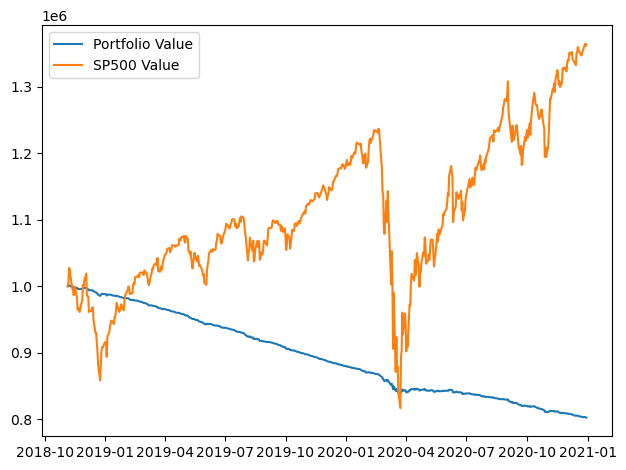

In [42]:
# Show backtest results

import matplotlib.pyplot as plt
  
# Create data
x = dates
y1 = backtest2['Portfolio Value'].values
y2 = backtest2['SP500 Value'].values

# Plot lines
plt.plot(x, y1, label = "Portfolio Value")
plt.plot(x, y2, label = "SP500 Value")
plt.legend()
plt.tight_layout()

plt.show()

In [43]:
# BackTest functions
def sharperatio(data):
    excess_return = data.mean() - RISK_FREE_RATE
    stddev = np.std(data)
    daily_sharpe = excess_return/stddev
    annualised_sharpe = daily_sharpe * np.sqrt(252)
    return daily_sharpe, annualised_sharpe

def drawdown_value(data):
    '''Calculates the drawdown duration and nominal value'''
    hwm = [0]
    idx = data.index
    drawdown = pd.Series(index = idx, dtype=float)
    duration = pd.Series(index = idx, dtype=float)
    for t in range(1, len(data)):
        cur_hwm = max(hwm[t-1], data[t])
        hwm.append(cur_hwm)
        drawdown[t]= hwm[t] - data[t]
        duration[t]= 0 if drawdown[t] == 0 else duration[t-1] + 1
    return drawdown.max(), duration.max()

def drawdowns(data):
    '''Calculates the percentage of drawdown and plot'''
    roll_max = data.rolling(window=backtest2.shape[0], min_periods=1).max()
    daily_drawdown = (data / roll_max) - 1.0
    max_daily_drawdown = daily_drawdown.rolling(window=1, min_periods=1).min()
    return max_daily_drawdown

def calmarratio(data):
    annualised_avg_return = data.mean() * 252
    max_dd = drawdowns(backtest2['Portfolio Value']).min()
    calmar = annualised_avg_return/ abs(max_dd)
    return calmar


----------------------------------------
# Back Test Key Results:
# Correlation: 0.9930719207288629
# CAPM Annualised Sharpe Ratio: -7.798
# Calmar Ratio: -0.514
# Max Drawdown ($): 198515.0
# Max Drawdown (%): -0.1982538043237172
# Max_dd_duration: 539.0
AxesSubplot(0.125,0.11;0.775x0.77)
----------------------------------------



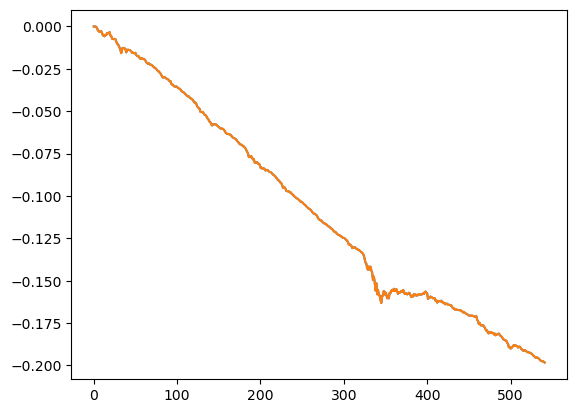

In [44]:
# Backtest Results
CR = round(calmarratio(backtest2['Portfolio Returns']),3)
Max_dd_value = round(drawdown_value(backtest2['Portfolio Value'])[0],0)
Max_dd_duration = drawdown_value(backtest2['Portfolio Value'])[1]
CAPM_AnnualS = round(sharperatio(backtest2['Portfolio Returns'])[1],3)
Max_dd_percentage = drawdowns(backtest2['Portfolio Value']).min()
drawdowns(backtest2['Portfolio Value']).plot()
Correlation = backtest2['Portfolio Returns'].corr(backtest2['SP500 Returns'])
Annualised_Returns = backtest2

backtest_result = f"""
{'-'*40}
# Back Test Key Results:
# Correlation: {Correlation}
# CAPM Annualised Sharpe Ratio: {CAPM_AnnualS}
# Calmar Ratio: {CR}
# Max Drawdown ($): {Max_dd_value}
# Max Drawdown (%): {Max_dd_percentage}
# Max_dd_duration: {Max_dd_duration}
{drawdowns(backtest2['Portfolio Value']).plot()}
{'-'*40}
"""

print(backtest_result)